In [2]:
from os import listdir, path, errno, makedirs
from shutil import copyfile

import re
from PIL import Image, ImageStat

import numpy as np
import pandas as pd
from scipy import stats
import scipy.fftpack
import matplotlib.pyplot as plt
import cv2 as cv
import scipy.misc

import util

%matplotlib inline

In [174]:
def func(img, n_scale=2000):
    filters = util.build_filters()
    res = util.process(util.normalize(img), filters)
#     res = util.process((img)/img.std(), filters)
    mean = np.mean(res) * 1
#     for i in range(res.shape[0]):
#         for j in range(res.shape[1]):
#             if (res[i][j] < mean):
#                 res[i][j] = 0
#             else:
#                 res[i][j] = 255
    
    res = res.reshape(-1)
    N = res.shape[0] / n_scale
    T = 1.0 / (255 * 2)
    yf = scipy.fftpack.fft(res)
    xf = np.linspace(0.0, 1.0 / (2.0 * T), int(N / 2))
    
    return xf[1:], (2.0 / N * np.abs(yf[:int(N / 2)]))[1:], res

In [175]:
def quick_test(p, n_scale=1):
    img = cv.imread(p, 0)
    clr = cv.imread(p)
    x, y, res = func(img, n_scale)
    t = clr.reshape((clr.shape[0]*clr.shape[1], 3))
    print(t.std(axis=0), t.mean(axis=0))
    print(t[:, [0, 2]].mean())
    plt.plot(x, y)

# imp
แกน x ยาวกว่า ba ( เกิน x = 100 ) และ มีค่า y ช่วงต้น ประมาณ 1 ถึง 2

[55.89704252 40.77935074 47.61966231] [146.4568268  149.56149652 132.18316214]
139.31999446902654


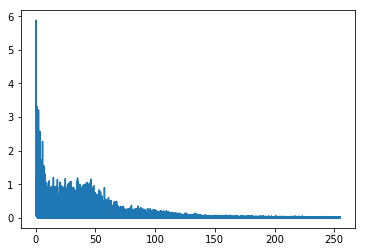

In [176]:
quick_test('/home/shsnail/approve/time_series_mining/TimeSeries_mid/imp/61379-primary-0-740x560.jpg')

[56.72112851 54.40507369 54.61670749] [102.61823045 132.67858711 170.78030178]
136.6992661179698


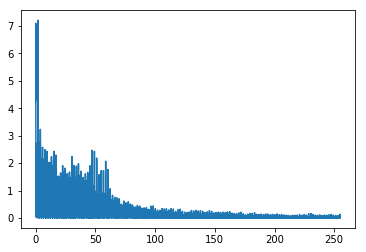

In [177]:
quick_test('/home/shsnail/approve/time_series_mining/TimeSeries_mid/imp/indian-wells-erin-hanson-prints.jpg')

[50.41777977 48.56576018 46.30940048] [112.26061953  93.68659933  78.34167228]
95.30114590347924


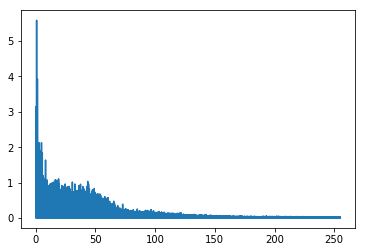

In [178]:
quick_test('/home/shsnail/approve/time_series_mining/TimeSeries_mid/imp/van-gogh-starry-night.jpg')

[52.3537478  49.01420118 62.34943945] [ 79.37927405 111.81269208 135.79968945]
107.58948175035289


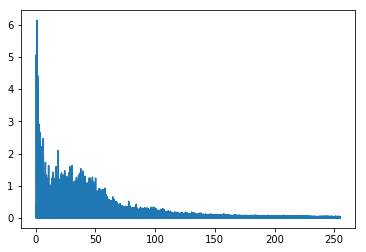

In [179]:
quick_test('/home/shsnail/approve/time_series_mining/TimeSeries_mid/imp/il_570xn-550871926_molt.jpg')

[29.03174429 29.02748126 45.54078514] [158.34780054 138.17671111 125.4941832 ]
141.9209918699187


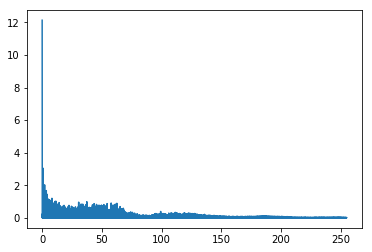

In [180]:
quick_test('/home/shsnail/approve/time_series_mining/TimeSeries_mid/imp/sunrise.jpg')

[45.42511472 66.79844243 63.32517442] [106.69530832 134.19690393 139.5874611 ]
123.14138470991655


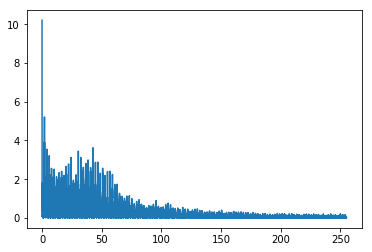

In [181]:
quick_test('/home/shsnail/approve/time_series_mining/TimeSeries_mid/imp/im09.jpg')

# ba
ค่า y 2 ถึง 4 แกน x ตกที่ 50 ถึง 75

[60.64363277 60.00662355 55.74948462] [ 93.8212295  110.2335563  126.86703695]
110.34413322185061


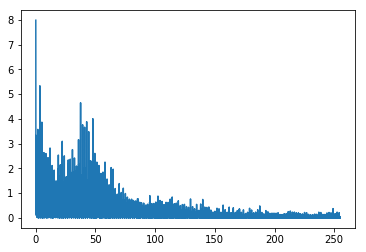

In [182]:
quick_test('/home/shsnail/approve/time_series_mining/TimeSeries_mid/ba/ba01.jpg')

[60.64363277 60.00662355 55.74948462] [ 93.8212295  110.2335563  126.86703695]
110.34413322185061


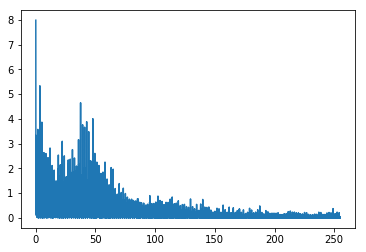

In [183]:
quick_test('/home/shsnail/approve/time_series_mining/TimeSeries_mid/ba/ba01.jpg')

[32.90371396 43.33153197 55.47575915] [ 93.25085645 108.75680707 125.01887166]
109.134864056714


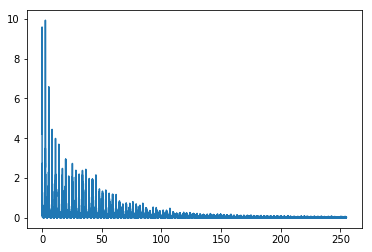

In [184]:
quick_test('/home/shsnail/approve/time_series_mining/TimeSeries_mid/ba/ba05.jpg')

[50.04597019 63.27379888 64.32491766] [56.94970929 65.76649774 86.11927605]
71.53449266901002


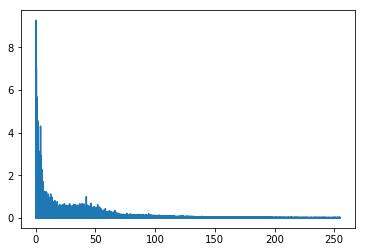

In [185]:
quick_test('/home/shsnail/approve/time_series_mining/TimeSeries_mid/ba/ba02.jpg')

[57.93765276 63.16365313 66.8877141 ] [ 89.5400998  105.80128412 136.10631477]
112.8232072860084


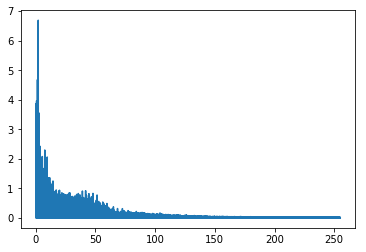

In [186]:
quick_test('/home/shsnail/approve/time_series_mining/TimeSeries_mid/ba/ba07.jpg')

[33.47145859 45.22823024 56.76779997] [30.96601307 57.48842048 95.03015977]
62.998086419753086


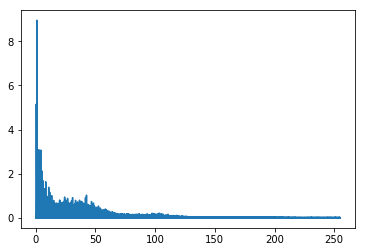

In [187]:
quick_test('/home/shsnail/approve/time_series_mining/TimeSeries_mid/ba/ba06.jpg')

[34.29319186 51.095743   60.14314148] [ 40.44671986  74.2466847  109.9432973 ]
75.1950085812357


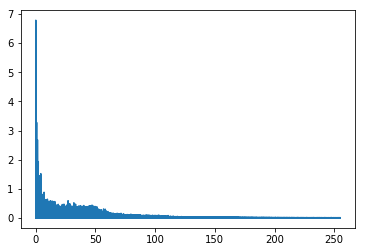

In [188]:
quick_test('/home/shsnail/approve/time_series_mining/TimeSeries_mid/ba/ba09.jpg')

# pop

[ 82.25900387  88.13867132 114.09120883] [ 79.58309219 112.3876875  133.47623437]
106.52966328125


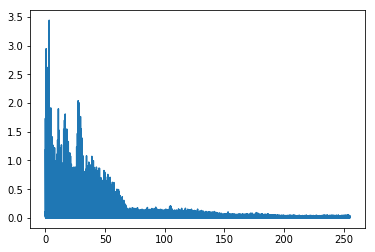

In [189]:
quick_test('/home/shsnail/approve/time_series_mining/TimeSeries_mid/pop/p01.png')

[83.21210379 91.35074358 81.04361249] [133.070633   132.93069529 179.28507744]
156.17785521885523


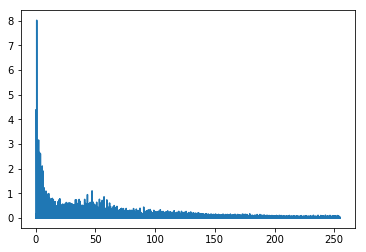

In [190]:
quick_test('/home/shsnail/approve/time_series_mining/TimeSeries_mid/pop/p07.jpg')

[98.51075067 95.21571756 88.3897662 ] [120.71762889 103.83501624 115.24380296]
117.98071592618992


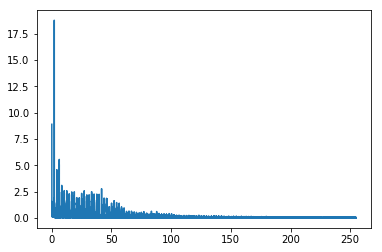

In [191]:
quick_test('/home/shsnail/approve/time_series_mining/TimeSeries_mid/pop/p10.jpg')

[91.72814509 90.9295272  98.76912011] [107.99309961 112.57488314 134.84578186]
121.4194407345576


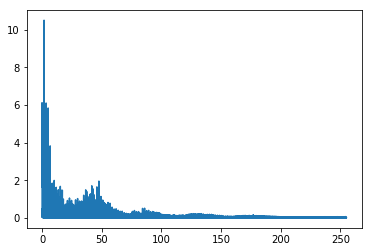

In [192]:
quick_test('/home/shsnail/approve/time_series_mining/TimeSeries_mid/pop/p08.jpg')

# mid

[35.26931479 66.23647803 86.90934635] [ 46.52563144  76.90423693 131.32899652]
88.92731397599691


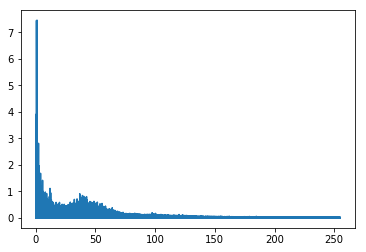

In [193]:
quick_test('/home/shsnail/approve/time_series_mining/TimeSeries_mid/middle/m01.jpg')

[46.49782131 49.07911341 57.59334819] [ 60.78603609  94.86387847 153.39862181]
107.09232894649237


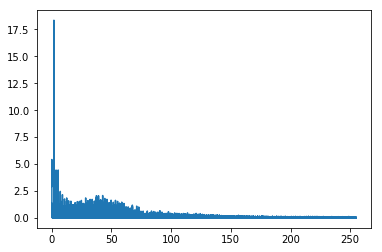

In [194]:
quick_test('/home/shsnail/approve/time_series_mining/TimeSeries_mid/middle/m02.jpg')

[51.26919019 63.73083842 66.62363298] [ 76.63516744 120.79735256 152.67468142]
114.65492442951694


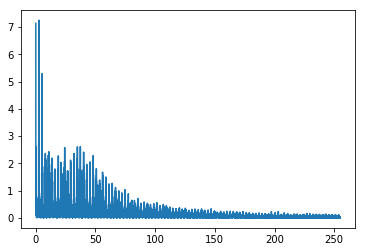

In [195]:
quick_test('/home/shsnail/approve/time_series_mining/TimeSeries_mid/middle/m03.jpg')

[73.83559342 67.32686231 68.90853951] [79.93295131 72.14030766 68.26939886]
74.10117508571429


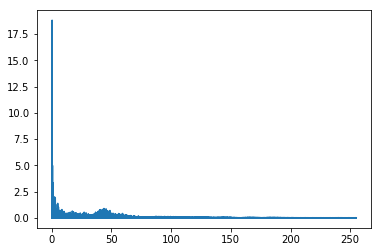

In [196]:
quick_test('/home/shsnail/approve/time_series_mining/TimeSeries_mid/middle/m06.jpg')

[60.45500445 63.84209965 75.89262255] [40.38181782 44.94662421 59.32452636]
49.85317209191947


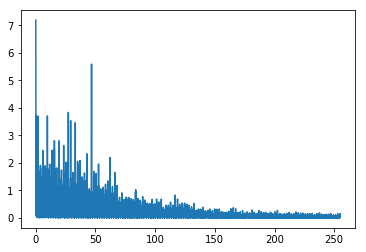

In [197]:
quick_test('/home/shsnail/approve/time_series_mining/TimeSeries_mid/middle/m07.jpg')